In [1]:
from urban_growth.simulator_refactor import *
from urban_growth.estimator_refactor import *
from matplotlib import pyplot as plt
%matplotlib inline

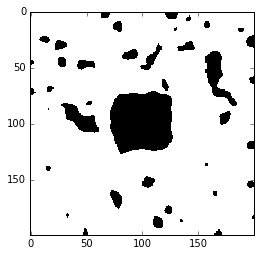

In [2]:
# Initial Configuration
L = 200
rho = .47
blur = 4

# Create the initial matrix and initialize a settlement_model object
M0 = random_mat(L, rho, blur = blur)
m = simulator(M0 = M0)

# Visualize the initial condition
plt.imshow(m.M0, interpolation = 'nearest', cmap = 'Greys')

In [3]:
alpha = np.array([12, 12])
beta  = np.array([-13, -13])
gamma = np.array([2.1, 3.5])
T_vec = [100]

In [4]:
M1 = m.dynamics(T_vec = T_vec,
                n_iters = 1, 
                verbose = True,  
                return_type = 'plain',
                alpha = alpha, 
                beta = beta, 
                gamma = gamma)

urban_growth/helpers.py:32: RuntimeWarning: invalid value encountered in divide
  x = - 1 / (3.0 * a) * (b + C1 + d0 / C1)
urban_growth/helpers.py:36: RuntimeWarning: divide by zero encountered in power
  return 2 * theta * (r_0 ** (2.0 - gamma) - r_1 ** (2.0 - gamma)) / (gamma - 2.0)


Step 1 completed


urban_growth/simulator_refactor.py:16: RuntimeWarning: invalid value encountered in less
  new_mat = (rands < prob) * 1


In [5]:
e = estimator(M0 = M0)
X = M1 - e.get_M0()
X[e.get_M0() == 1] = np.nan

e.partition_clusters(T_vec)
e.distance_variables()

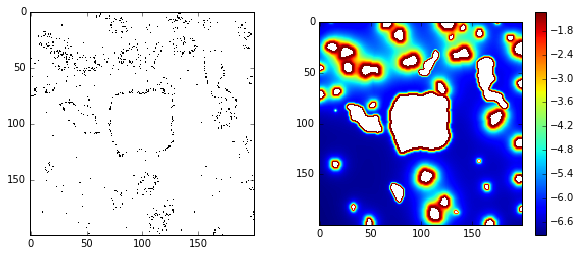

In [6]:
Y = e.logistic_density(alpha = alpha, beta = beta, gamma = gamma)

f, axarr = plt.subplots(1, 2, figsize = (10, 4))
im = axarr[1].imshow(np.log(Y), interpolation = 'nearest')
plt.colorbar(im)
axarr[0].imshow(X, interpolation = 'nearest', cmap = 'Greys')

In [7]:
e.log_likelihood(M1, normalized = True, alpha = alpha, beta = beta, gamma = gamma)

-3.093705256161932

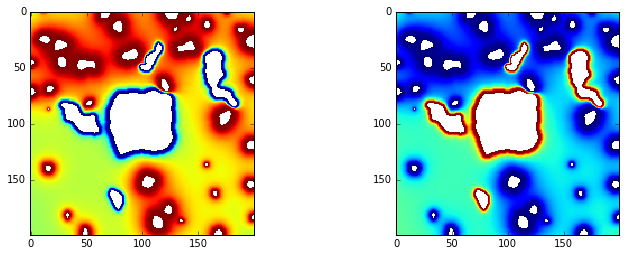

In [8]:
e.E_step(alpha = alpha, beta = beta, gamma = gamma)
f, axarr = plt.subplots(1, 2, figsize = (12, 4))
for i in range(2):
    axarr[i].imshow(e.Q[i], interpolation = 'nearest', vmin = 0, vmax = 1)

In [9]:
p = e.logistic_components(alpha = alpha, beta = beta, gamma = gamma)

# EM Algorithm for the Logistic Model

In [51]:
alpha_0 = alpha.astype('float') + 2 * (np.random.rand() - .5)
beta_0  = beta.astype('float') + 2 * (np.random.rand() - .5)
gamma_0 = np.array([3.5, 2.6])

estimates = e.EM(M1, 
                 alpha_0, 
                 beta_0, 
                 gamma_0, 
                 n_iters = 100, 
                 verbose = True, 
                 tol = .0001, 
                 eta = .001,
                 n_inner = 10, 
                 inner_tol = .0001)

ll0 : -4.84
ll  : -4.38
ll  : -4.25
ll  : -4.24
ll  : -4.23
ll  : -4.23
ll  : -4.22
ll  : -4.22
ll  : -4.22
ll  : -4.21
ll  : -4.21
ll  : -4.21
ll  : -4.21
ll  : -4.2
ll  : -4.2
ll  : -4.2
ll  : -4.2
ll  : -4.2
ll  : -4.2
ll  : -4.2
ll  : -4.2


In [52]:
print np.array([alpha, beta, gamma])
print np.round(np.array([estimates[0:3]]), 2)

[[ 12.   12. ]
 [-13.  -13. ]
 [  2.1   3.5]]
[[[ 12.44  12.4 ]
  [-12.86 -12.87]
  [  3.59   3.62]]]


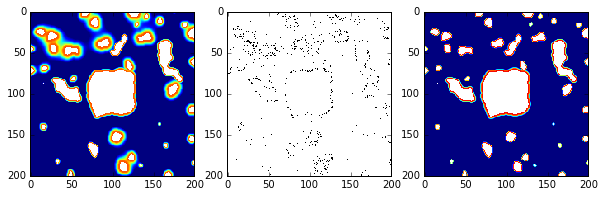

In [53]:
Y = e.logistic_density(alpha = alpha, beta = beta, gamma = gamma)

f, axarr = plt.subplots(1, 3, figsize = (10, 4))
im = axarr[0].imshow(np.log(Y), interpolation = 'nearest', vmin = -5, vmax = -.5)

im = axarr[1].imshow(X, interpolation = 'nearest', cmap = 'Greys')

Y_hat = e.logistic_density(alpha = estimates[0], beta = estimates[1], gamma = estimates[2])
im = axarr[2].imshow(np.log(Y_hat), interpolation = 'nearest', vmin = -5, vmax = -.5)

These appear to get bigger across the axes, so in addition to any other issues there is likely some kind of index mistake here. 